In [201]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score

In [202]:
df = pd.read_csv("/content/heart.csv")

In [203]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [204]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [205]:
df.dropna(inplace=True)

In [206]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,53.442641,132.432900,198.771645,0.231602,136.833333,0.886472,0.553030
std,9.448381,18.459374,109.039919,0.422084,25.514093,1.064873,0.497449
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             924 non-null    int64  
 1   Sex             924 non-null    object 
 2   ChestPainType   924 non-null    object 
 3   RestingBP       924 non-null    int64  
 4   Cholesterol     924 non-null    int64  
 5   FastingBS       924 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    int64  
 8   ExerciseAngina  924 non-null    object 
 9   Oldpeak         924 non-null    float64
 10  ST_Slope        924 non-null    object 
 11  HeartDisease    924 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.8+ KB


In [208]:
le = LabelEncoder()


In [209]:
column_names = df.columns.tolist()

In [210]:
categorical = [col for col in column_names if df[col].dtype == 'object']

In [211]:
for col in categorical:
    df[col] = le.fit_transform(df[col])

In [212]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [213]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,53.442641,0.787879,0.782468,132.432900,198.771645,0.231602,0.989177,136.833333,0.404762,0.886472,1.362554,0.553030
std,9.448381,0.409032,0.956970,18.459374,109.039919,0.422084,0.629616,25.514093,0.491112,1.064873,0.606523,0.497449
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,174.750000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,222.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


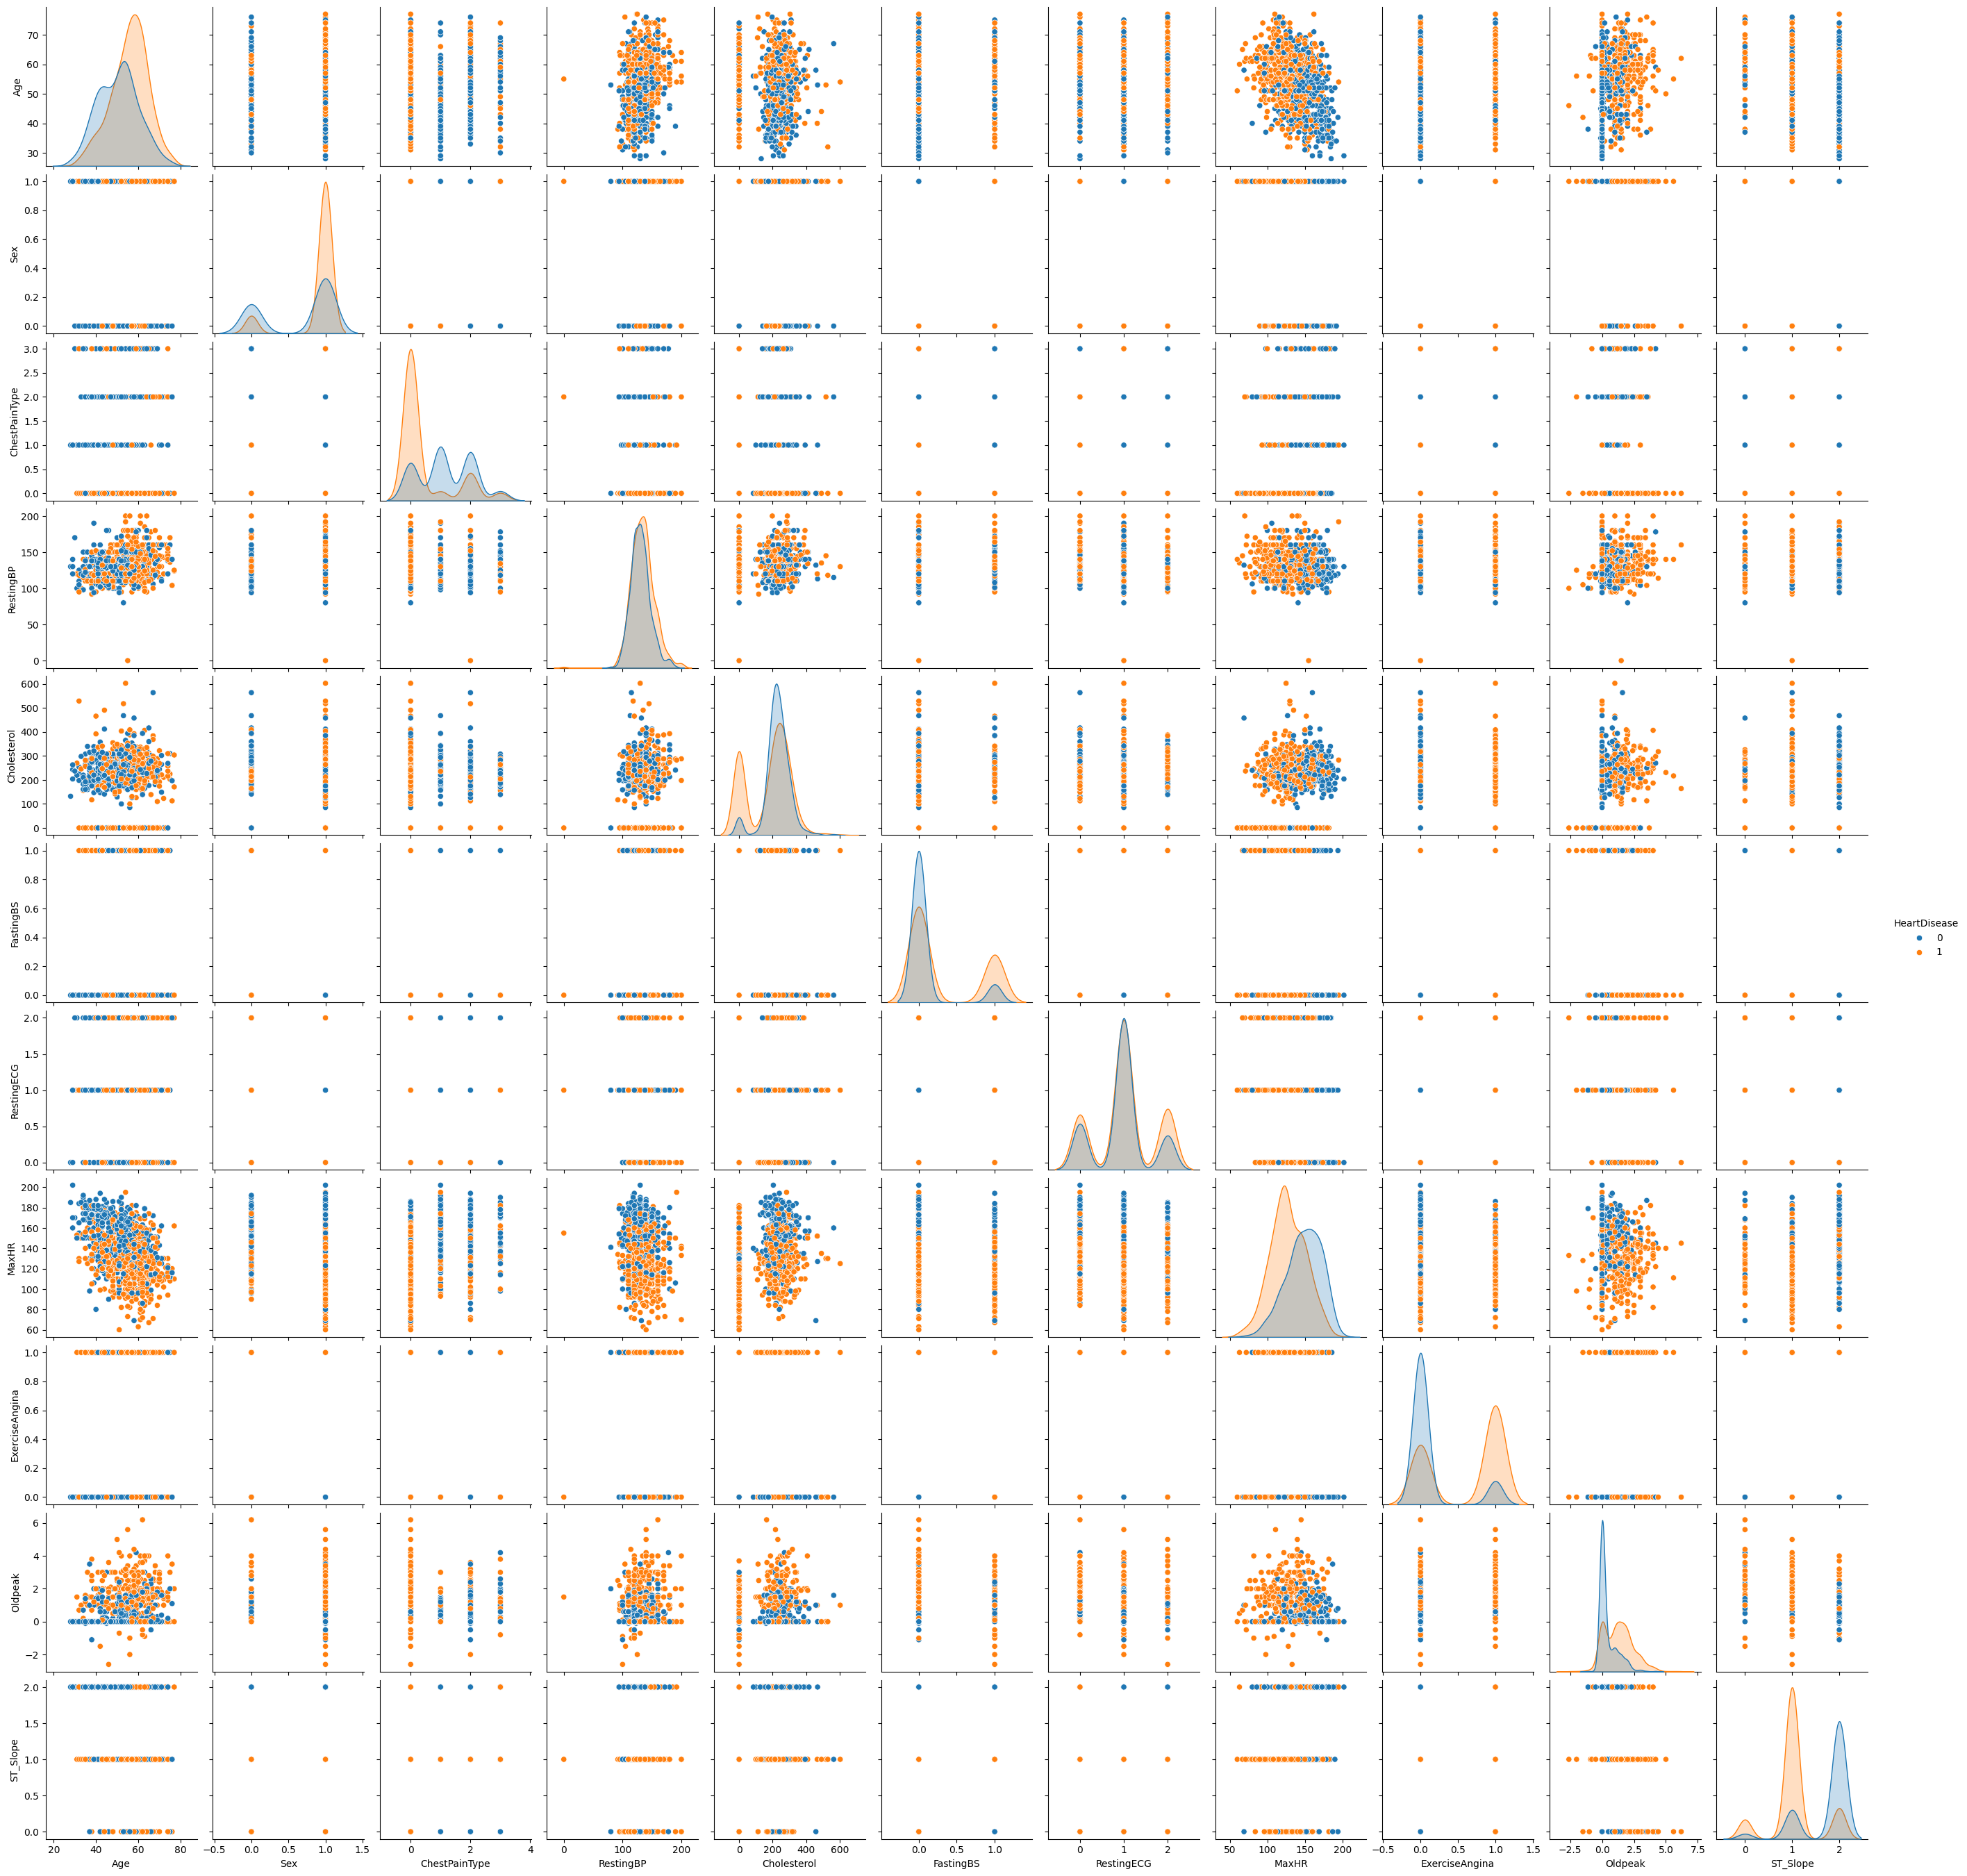

In [214]:
sns.pairplot(df,hue = "HeartDisease")

In [215]:
corr_matrix = df.corr()

<Axes: >

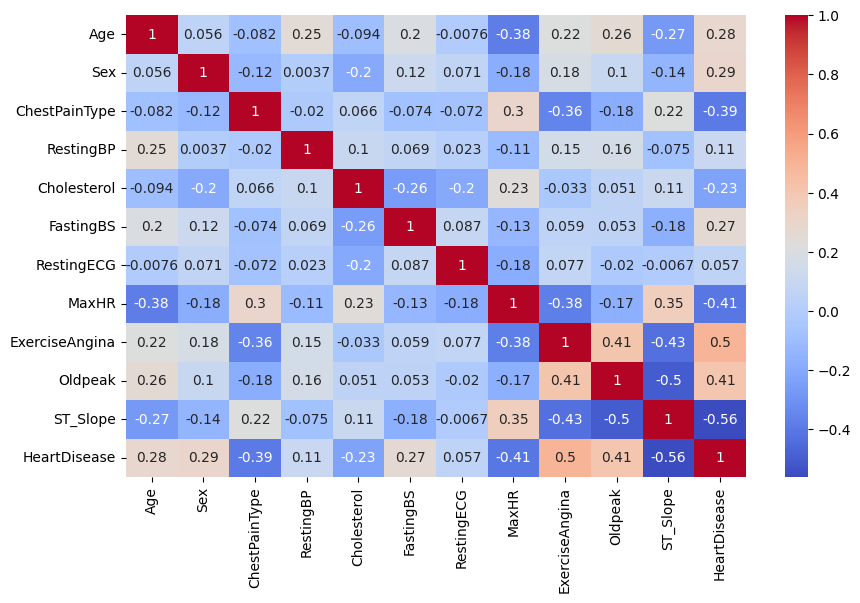

In [216]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix,annot=True,cmap = "coolwarm")

In [217]:
X = df.drop("HeartDisease",axis = 1)
y = df["HeartDisease"]

In [218]:
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [219]:
# Store results
wcss = []  # within-cluster sum of squares for elbow method
accuracies = []


In [220]:
for i in range(2,30):
  k_means = KMeans(n_clusters=i, random_state=42)
  cluster_labels = k_means.fit_predict(X_train)
  # Align clusters with true labels using mode
  aligned_labels = np.zeros_like(cluster_labels)
  for j in range(i):

    mask = (cluster_labels == j)
    if len(y_train[mask]) == 0:
        continue
    aligned_labels[mask] = mode(y_train[mask], keepdims=True)[0]

  acc = accuracy_score(y_train, aligned_labels)
  accuracies.append(acc)
  wcss.append(k_means.inertia_)



In [221]:
len(wcss),len(accuracies)

(28, 28)

In [222]:
wcss,accuracies

([2429062.4581819377,
  1398313.262366019,
  1076841.7564776347,
  901936.827659683,
  784853.462457103,
  745026.9253726077,
  675746.5299529636,
  632518.3412489671,
  576666.1246659546,
  524055.18641612196,
  497538.7662639211,
  477245.9519066089,
  462171.0303807746,
  444271.9165553834,
  421878.9434923713,
  406018.00217269646,
  392332.933544284,
  374546.29376346886,
  364428.11778157164,
  342449.92157923675,
  338534.89639310807,
  328550.48747009813,
  322456.1252254039,
  311325.3299935169,
  300793.00655360165,
  287578.994854026,
  278532.036976995,
  273463.6395120946],
 [0.5897832817337462,
  0.5882352941176471,
  0.5913312693498453,
  0.5882352941176471,
  0.6547987616099071,
  0.6547987616099071,
  0.6470588235294118,
  0.673374613003096,
  0.6826625386996904,
  0.6826625386996904,
  0.6904024767801857,
  0.7058823529411765,
  0.7058823529411765,
  0.6919504643962848,
  0.6764705882352942,
  0.6811145510835913,
  0.6857585139318886,
  0.6965944272445821,
  0.6965944

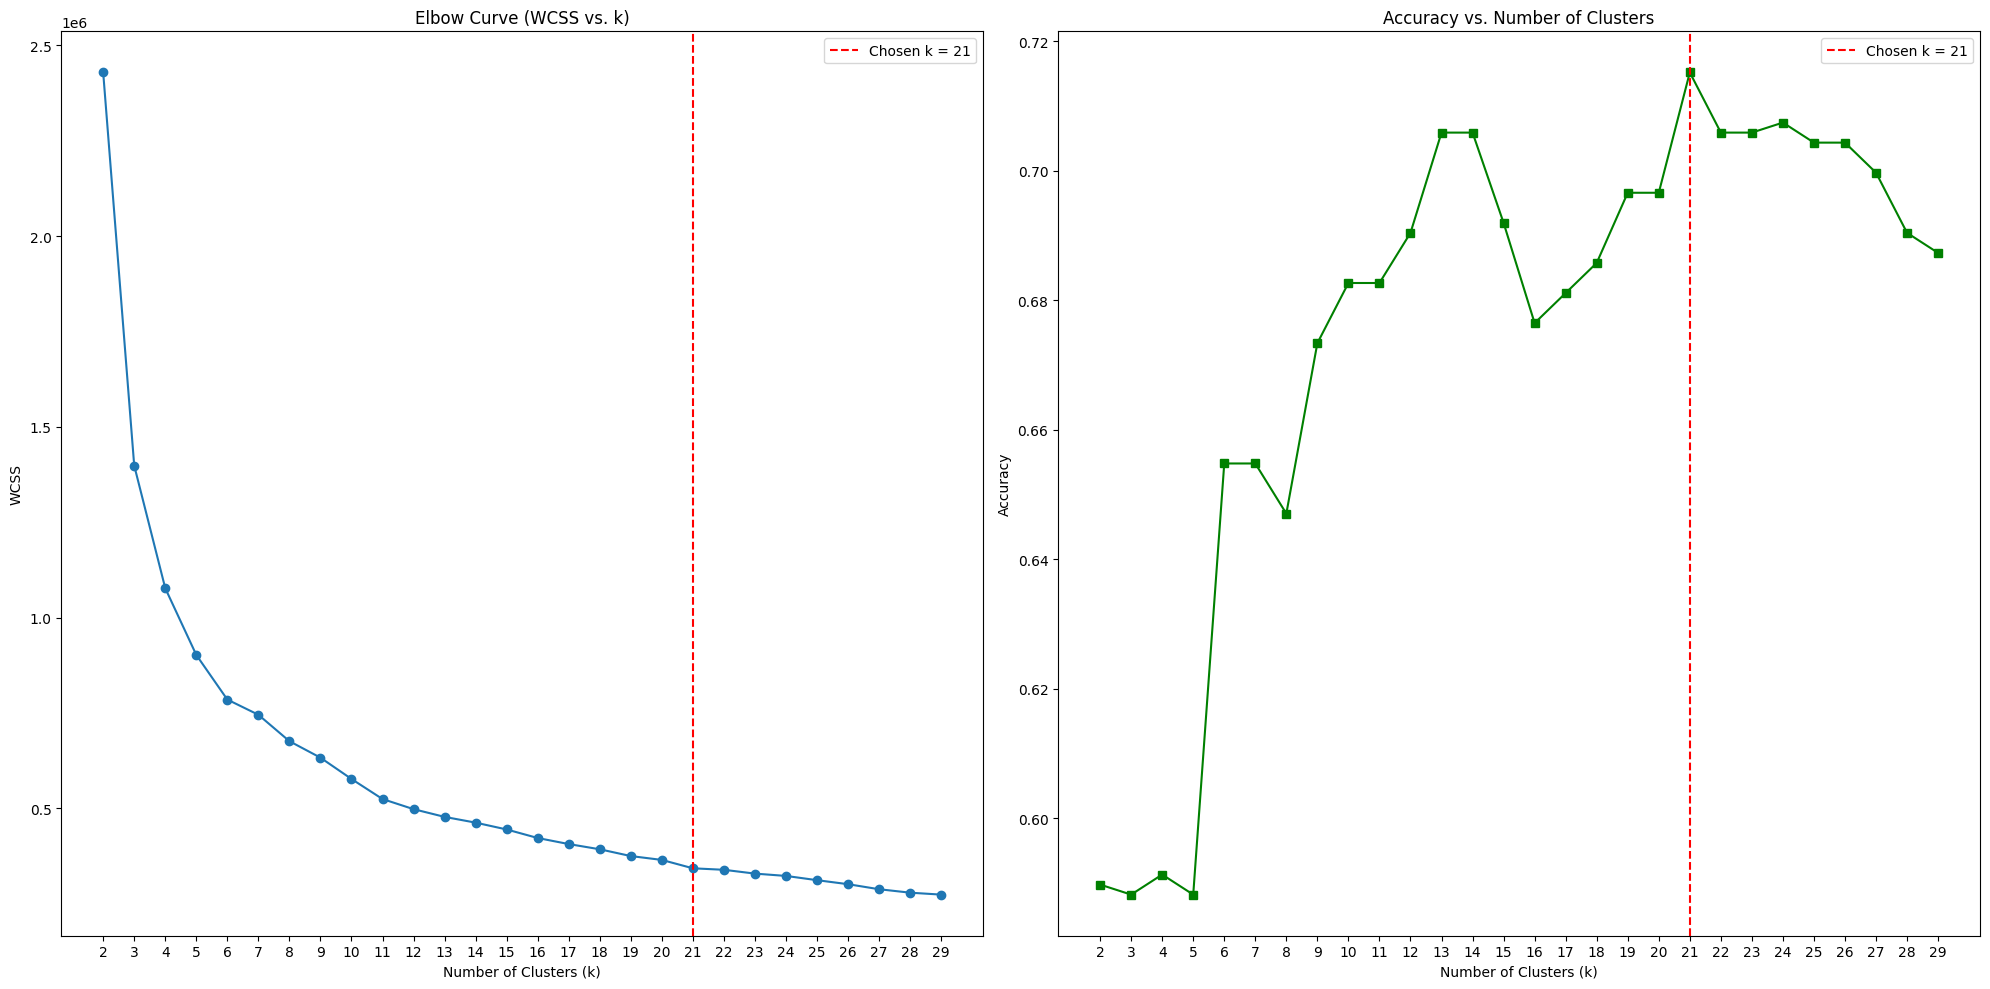

In [226]:
# Plotting
best_k = 21
k_values = list(range(2, len(wcss) + 2))

plt.figure(figsize=(20, 10))

# Elbow Curve
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Chosen k = {best_k}')
plt.title("Elbow Curve (WCSS vs. k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.xticks(k_values)

plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(k_values, accuracies, marker='s', color='green')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Chosen k = {best_k}')
plt.title("Accuracy vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()

plt.tight_layout()
plt.show()

In [228]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=21, random_state=42)

In [233]:
new_patient = pd.DataFrame([{
    'Age': 55,
    'Sex':1,
    'ChestPainType': 1,
    'RestingBP': 140,
    'Cholesterol': 220,
    'FastingBS': 0,
    'RestingECG': 1,
    'MaxHR': 150,
    'ExerciseAngina': 0,
    'Oldpeak': 1.0,
    'ST_Slope': 1
}])

In [236]:
new_patient = new_patient[X_train.columns]


In [243]:
cluster_labels = kmeans.predict(new_patient)

In [244]:
cluster_labels

array([7], dtype=int32)

In [242]:
train_cluster_labels = kmeans.predict(X_train)
assigned_labels = np.zeros_like(train_cluster_labels)
for i in range(best_k):
    mask = (train_cluster_labels == i)
    if len(y_train[mask]) > 0:
        assigned_labels[mask] = mode(y_train[mask], keepdims=True)[0]

# Final risk prediction for the new patient
predicted_risk = assigned_labels[cluster_labels]
cluster_labels, predicted_risk

(np.int32(7), np.int32(0))